# 📌 PROJETO – DASHBOARD COM DADOS DO RECLAME AQUI
## MBA em Ciência de Dados – Disciplina: Dashboards em Python
* Prof. Túlio Ribeiro
## Alunos
* Igor Florentino
* Rodrigo Galba
* João Paulo

### **Descrição**

* O objetivo é criar um painel interativo com **Streamlit** utilizando dados de reclamações do Reclame Aqui.

### **O painel deve conter**

* **Série temporal** do número de reclamações.
* **Frequência de reclamações por estado.**
* **Frequência por tipo de** `STATUS`.
* **Distribuição do tamanho dos textos** das reclamações (coluna `DESCRIÇÃO`).
* **WordCloud** com as palavras mais frequentes nos textos das descrições.
* **Mapa do Brasil com heatmap** mostrando a quantidade de reclamações por **ano**, com granularidade por **estado ou município**.

  > O mapa **deve conter um seletor para o ano** que será visualizado.

### **Os gráficos devem ser interativos e filtráveis com seletores de:**

* Estado
* Status
* Faixa de tamanho do texto da reclamação

In [1]:
import os
import pandas as pd

# Define o caminho absoluto do arquivo CSV
csv_path = os.path.abspath('../datasets/RECLAMEAQUI_IBYTE.csv')

# Verifica se o arquivo existe antes de tentar carregá-lo
if os.path.exists(csv_path):
	df = pd.read_csv(csv_path)
	print("Arquivo carregado com sucesso!")
else:
	print(f"Arquivo não encontrado: {csv_path}")

Arquivo carregado com sucesso!


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1000 non-null   int64 
 1   TEMA           1000 non-null   object
 2   LOCAL          1000 non-null   object
 3   TEMPO          1000 non-null   object
 4   CATEGORIA      1000 non-null   object
 5   STATUS         1000 non-null   object
 6   DESCRICAO      1000 non-null   object
 7   URL            1000 non-null   object
 8   ANO            1000 non-null   int64 
 9   MES            1000 non-null   int64 
 10  DIA            1000 non-null   int64 
 11  DIA_DO_ANO     1000 non-null   int64 
 12  SEMANA_DO_ANO  1000 non-null   int64 
 13  DIA_DA_SEMANA  1000 non-null   int64 
 14  TRIMETRES      1000 non-null   int64 
 15  CASOS          1000 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 125.1+ KB


In [3]:
df.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS
0,21898349,Quebraram a tela do meu Notebook,Hidrolândia - CE,2016-02-11,Ibyte - Loja Física<->Informática,Resolvido,Em 05/10/2016 deixei meu Notebook para consert...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,2,11,42,6,3,1,1
1,22581481,Solicitação de Cancelamento de Compra,Araxá - MG,2016-03-12,Não consigo fazer operação por telefone<->Cana...,Em réplica,"Prezados, efetuei uma compra no site www.ameri...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2
2,22579385,Inutilizarão a tela do meu notebook,Fortaleza - CE,2016-03-12,Problemas na Loja<->Ibyte - Loja Física<->Prod...,Respondida,Decidi conserta meu notebook que parou de inic...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2
3,21328791,Produto não faz o que vendedor informa!,Fortaleza - CE,2016-04-10,Ibyte - Loja Física<->Impressoras<->Produto er...,Em réplica,Venho através desde canal de reclamação expor ...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,4,10,101,14,6,2,1
4,22608043,Ibyte não troca o produto,Fortaleza - CE,2016-05-12,Smartphone<->Celulares e Smartphones<->Blackfr...,Respondida,Comprei um celular na black Friday e com 4 dia...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,5,12,133,19,3,2,2


In [4]:
# Feature Engineering

# Converte a coluna 'TEMPO' para o tipo datetime
df['TEMPO'] = pd.to_datetime(df['TEMPO'])

# Extrai MUNICIPIO e UF da coluna LOCAL
df[['MUNICIPIO', 'UF']] = df['LOCAL'].str.split('-', n=1, expand=True)
df['MUNICIPIO'] = df['MUNICIPIO'].str.strip()
df['UF'] = df['UF'].str.strip()

df.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,MUNICIPIO,UF
0,21898349,Quebraram a tela do meu Notebook,Hidrolândia - CE,2016-02-11,Ibyte - Loja Física<->Informática,Resolvido,Em 05/10/2016 deixei meu Notebook para consert...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,2,11,42,6,3,1,1,Hidrolândia,CE
1,22581481,Solicitação de Cancelamento de Compra,Araxá - MG,2016-03-12,Não consigo fazer operação por telefone<->Cana...,Em réplica,"Prezados, efetuei uma compra no site www.ameri...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,Araxá,MG
2,22579385,Inutilizarão a tela do meu notebook,Fortaleza - CE,2016-03-12,Problemas na Loja<->Ibyte - Loja Física<->Prod...,Respondida,Decidi conserta meu notebook que parou de inic...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,Fortaleza,CE
3,21328791,Produto não faz o que vendedor informa!,Fortaleza - CE,2016-04-10,Ibyte - Loja Física<->Impressoras<->Produto er...,Em réplica,Venho através desde canal de reclamação expor ...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,4,10,101,14,6,2,1,Fortaleza,CE
4,22608043,Ibyte não troca o produto,Fortaleza - CE,2016-05-12,Smartphone<->Celulares e Smartphones<->Blackfr...,Respondida,Comprei um celular na black Friday e com 4 dia...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,5,12,133,19,3,2,2,Fortaleza,CE


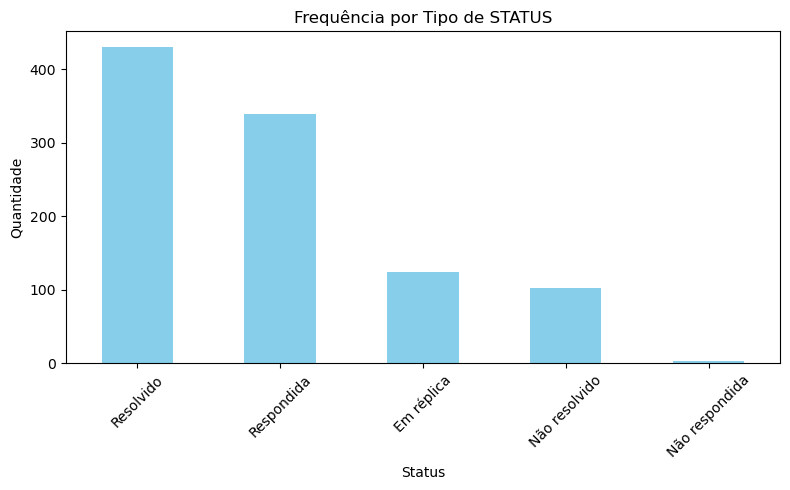

In [5]:
import matplotlib.pyplot as plt

status_counts = df['STATUS'].value_counts()
plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Frequência por Tipo de STATUS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

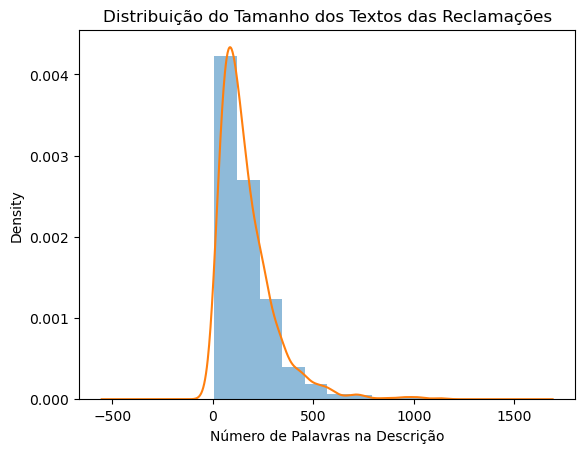

In [6]:
import matplotlib.pyplot as plt

def count_palavras(texto):
    return len(texto.split())

df['DESCRICAO'].apply(count_palavras).plot(kind='hist', density=True, alpha=0.5)
df['DESCRICAO'].apply(count_palavras).plot.kde()
plt.xlabel('Número de Palavras na Descrição')
plt.title('Distribuição do Tamanho dos Textos das Reclamações')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 3.1 MB/s eta 0:00:003.1 MB/s eta 0:00:01m
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/igorflorentino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


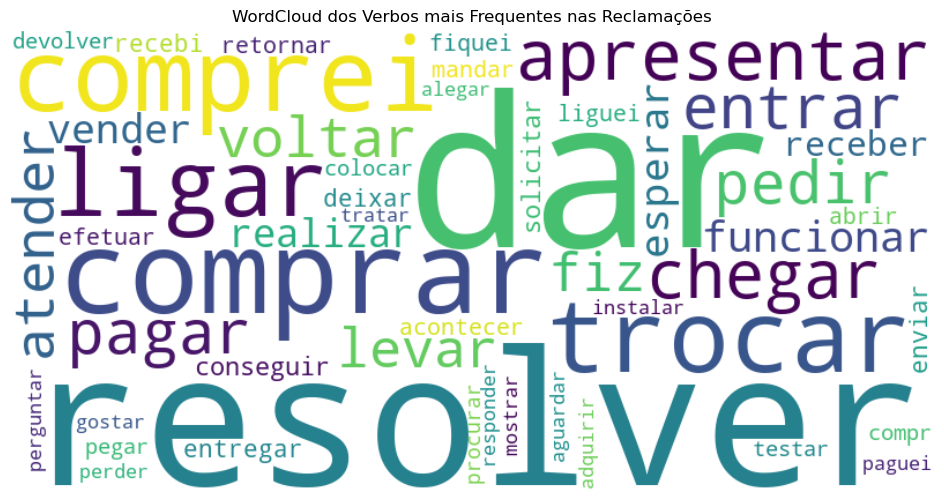

In [7]:
# WordCloud de Verbos

# Instale o spaCy e o modelo de linguagem para português
!python -m spacy download pt_core_news_sm

import spacy
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Baixe as stopwords do NLTK (se ainda não tiver feito)
nltk.download('stopwords')

# Carregue o modelo spaCy para português
nlp = spacy.load("pt_core_news_sm")

# Defina as stopwords em português e, opcionalmente, exclua verbos muito genéricos
stopwords_pt = set(stopwords.words("portuguese"))
# Se quiser, retire verbos genéricos como "ser", "estar", etc.
stopwords_pt |= {"ser", "estar", "ter", "haver", "dizer", "fazer", "ir", 
                 "ver", "poder", "saber", "querer", "dever", "ficar", "passar",
                "vir", "ficar", "sair", "começar", "terminar", "continuar", "precisar",
                "achar", "encontrar", "tentar", "usar", "falar", "ouvir", "dormir",
                "informar", "ibyte"}

# Concatene todos os textos da coluna 'DESCRICAO'
textos = df['DESCRICAO'].astype(str).tolist()

# Extraia apenas os verbos, lematizados e em minúsculas
verb_lemmas = []
for doc in nlp.pipe(textos, disable=["ner", "parser"]):
    for token in doc:
        if token.pos_ == "VERB":
            lemma = token.lemma_.lower()
            # Filtra apenas tokens alfabéticos e não-stopwords
            if lemma.isalpha() and lemma not in stopwords_pt:
                verb_lemmas.append(lemma)

# Crie a string de entrada para a WordCloud
texto_verbal = " ".join(verb_lemmas)

# Gere a nuvem de palavras com foco apenas em verbos
wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=50
).generate(texto_verbal)

# Exiba o resultado
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dos Verbos mais Frequentes nas Reclamações")
plt.show()

Top 10 adjetivos: [('novo', 212), ('técnico', 197), ('fiscal', 181), ('bom', 143), ('físico', 128), ('segundo', 108), ('seguinte', 101), ('primeiro', 101), ('possível', 84), ('grande', 82)]


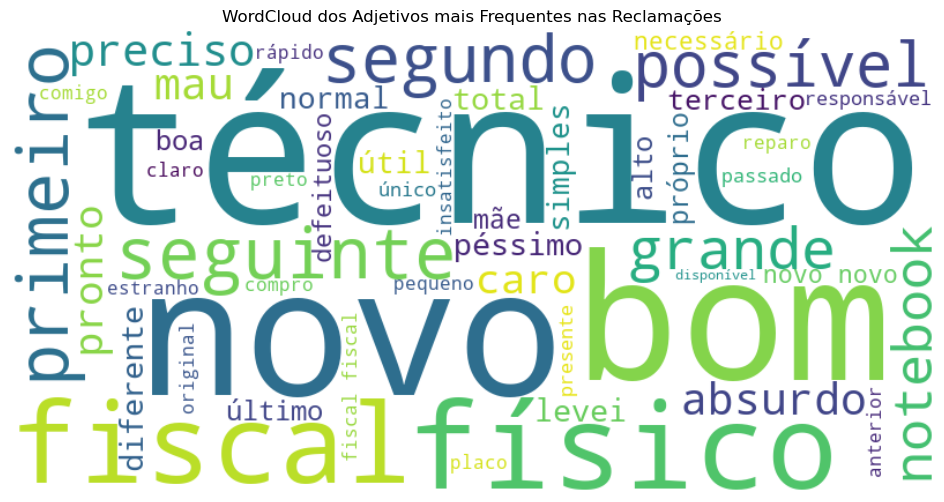

In [ ]:
# WordCloud de Adjetivos

# Extraia apenas os adjetivos, lematizados e em minúsculas
adj_lemmas = []
for doc in nlp.pipe(textos, disable=["ner"]):
    for token in doc:
        # filtra tokens alfabéticos e do tipo ADJ (adjetivo)
        if token.is_alpha and token.pos_ == "ADJ":
            lemma = token.lemma_.lower()
            # remove stopwords e termos genéricos (pode adicionar mais)
            if lemma not in stopwords_pt:
                adj_lemmas.append(lemma)

# Os 10 adjetivos mais frequentes
from collections import Counter
freq_adj = Counter(adj_lemmas)
print("Top 10 adjetivos:", freq_adj.most_common(10))

# Gere a nuvem de adjetivos
texto_adjetival = " ".join(adj_lemmas)
wc_adj = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=50
).generate(texto_adjetival)

# Exiba o resultado
plt.figure(figsize=(12, 6))
plt.imshow(wc_adj, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dos Adjetivos mais Frequentes nas Reclamações")
plt.show()